In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load the dataset
df = pd.read_csv('titanic.csv')

# Select the feature and target
X = df[['Fare']]
y = df['Survived']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fit the logistic regression model
lg = LogisticRegression()
lg.fit(X_train , y_train)


LogisticRegression()

In [4]:
pred = lg.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test , pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[107  10]
 [ 47  14]]


In [6]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       154
           1       0.23      0.58      0.33        24

    accuracy                           0.68       178
   macro avg       0.57      0.64      0.56       178
weighted avg       0.82      0.68      0.73       178



In [10]:
print(matthews_corrcoef(pred , y_test))

0.2001563095664725


In [13]:
tp , fp , fn ,tn = cm.ravel()
print("Specificity")
print(tn/(tn+fp))

Specificity
0.5833333333333334


In [30]:
# Model predicted probabilities
model_probs = lg.predict_proba(X_test)[: ,1]

# Manually calculated probabilities
# Ensuring coef_ is a scalar
manual_probs = 1 / (1 + np.exp(-(lg.intercept_ + lg.coef_.item() * X_test.values.ravel())))

# Limiting to first 10 for visibility
model_probs, manual_probs = model_probs[:10], manual_probs[:10]

# Difference in predicted probabilities
difference_in_probabilities = model_probs - manual_probs

# Create a DataFrame for nicer output
df_output = pd.DataFrame({
    "Model Probs": model_probs,
    "Manual Probs": manual_probs,
    "Difference": difference_in_probabilities
})

# Print DataFrame
(df_output)


,Model Probs,Manual Probs,Difference
0,0.315195,0.315195,0.0
1,0.541012,0.541012,0.0
2,0.427495,0.427495,0.0
3,0.315428,0.315428,0.0
4,0.375781,0.375781,0.0
5,0.289944,0.289944,0.0
6,0.476360,0.476360,0.0
7,0.340003,0.340003,0.0
8,0.379662,0.379662,0.0
9,0.377690,0.377690,0.0


<Axes: >

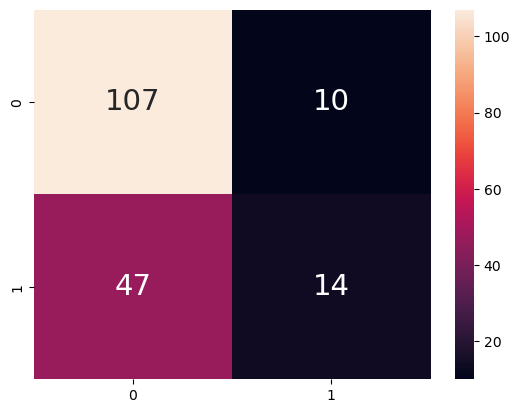

In [36]:
array = pd.DataFrame(cm , range(2) , range(2))
sb.heatmap(array , annot = True , annot_kws = {'size' :21} , fmt = 'd')